# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Définition du problème

In [5]:
def fonction_cachee(x: float) -> float:
    """Cible de l'apprentissage."""
    return np.sin(2 * x) * np.exp(x / 10.)

In [6]:
A, B = 0, 10.

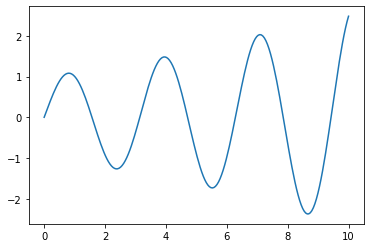

In [7]:
x = np.linspace(A, B, 200)
y = fonction_cachee(x)
plt.plot(x, y)

# Génération des données

In [22]:
nb_de_points = 20
taille_bruit = 0.5

In [23]:
points_homogenes = np.linspace(A, B, nb_de_points)

In [24]:
valeurs_cachees = fonction_cachee(points_homogenes)

In [25]:
valeurs_observees = (
    valeurs_cachees 
    + taille_bruit * np.random.normal(loc=0, scale=taille_bruit, size=nb_de_points)
)

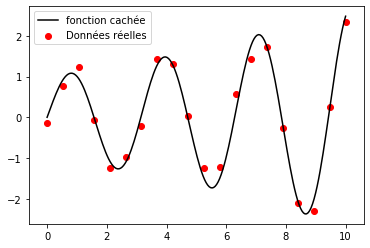

In [26]:
# Q. Visualiser la fonction cachée et les points observées

fig, rep = plt.subplots()
x = np.linspace(A, B, 200)
y = fonction_cachee(x)
rep.plot(x, y, label="fonction cachée", color="black")
rep.scatter(points_homogenes, valeurs_observees, label="Données réelles", color="red")
rep.legend()

solveur converge?  True


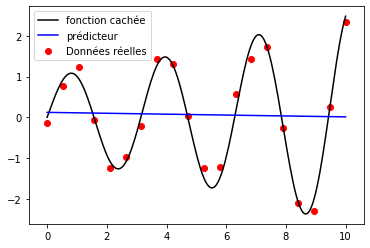

In [36]:
# Q. Calculer la régression linéaire

def erreur(coefficients):
    a,b = coefficients
    return (
        np.sum((valeurs_observees - a * points_homogenes - b) ** 2)
        / (2. * nb_de_points)
    )

resultat = opt.minimize(fun=erreur, x0=np.zeros(shape=(2,)))
print("solveur converge? ", resultat.success)
a, b = resultat.x

fig, rep = plt.subplots()
x = np.linspace(A, B, 200)
y = fonction_cachee(x)
rep.plot(x, y, label="fonction cachée", color="black")
rep.scatter(points_homogenes, valeurs_observees, label="Données réelles", color="red")
rep.plot(x, a * x + b, label="prédicteur", color="blue")
rep.legend()

In [38]:
erreur([a,b])

0.798826050287063

**Conclusion** les modèles considérés (fonctions affines) n'ont pas assez de complexité pour reproduire la fonction!

solveur converge?  True


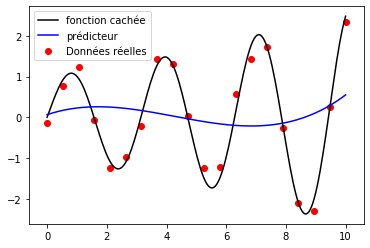

In [39]:
# Q. Faire la régression polynomiale de degrés 3

def erreur(coefficients):
    a, b, c, d = coefficients
    return (
        np.sum(
            (valeurs_observees 
             - a * points_homogenes ** 3 
             - b * points_homogenes ** 2 
             - c * points_homogenes
             - d 
            ) ** 2)
        / (2. * nb_de_points)
    )

resultat = opt.minimize(fun=erreur, x0=np.zeros(shape=(4,)))
print("solveur converge? ", resultat.success)
a, b, c, d = resultat.x

fig, rep = plt.subplots()
x = np.linspace(A, B, 200)
y = fonction_cachee(x)
rep.plot(x, y, label="fonction cachée", color="black")
rep.scatter(points_homogenes, valeurs_observees, label="Données réelles", color="red")
rep.plot(x, a * x **3 + b * x ** 2 + c * x + d, label="prédicteur", color="blue")
rep.legend()

In [40]:
erreur([a,b,c,d])

0.7793506485470949

solveur converge?  False


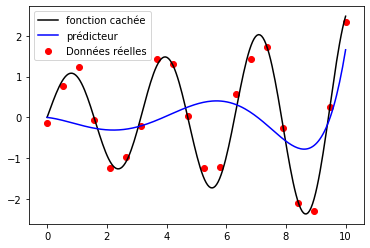

In [43]:
# Q. coder la régression polynomiale générale

degres = 6

def poly(abcisses, coefficients):
    resultat = np.zeros_like(abcisses)
    monome = np.ones_like(abcisses)
    for coef in coefficients:
        resultat = resultat + coef * monome
        monome = monome * abcisses
    return resultat

def erreur(coefficients):
    valeurs_calculees = poly(points_homogenes, coefficients)
    return (
        np.sum(
            (valeurs_observees 
             - valeurs_calculees
            ) ** 2)
        / (2. * nb_de_points)
    )

resultat = opt.minimize(fun=erreur, x0=np.zeros(shape=(degres+1,)))
print("solveur converge? ", resultat.success)


fig, rep = plt.subplots()
x = np.linspace(A, B, 200)
y = fonction_cachee(x)
rep.plot(x, y, label="fonction cachée", color="black")
rep.scatter(points_homogenes, valeurs_observees, label="Données réelles", color="red")
rep.plot(x, poly(x, resultat.x), label="prédicteur", color="blue")
rep.legend()

In [44]:
erreur(resultat.x)

0.5872037351810733

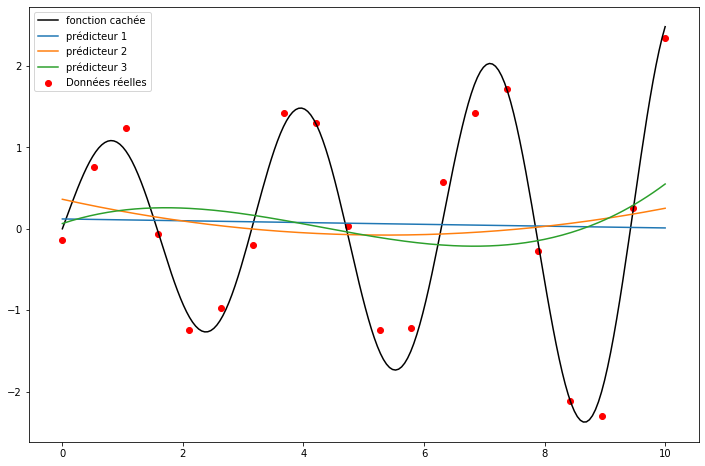

In [51]:
# Q. produire le  même graphique avec les prédicteurs de degré: 1 3 5 7 9, 
# et afficher la fonction degres -> erreur

def poly(abcisses, coefficients):
    resultat = np.zeros_like(abcisses)
    monome = np.ones_like(abcisses)
    for coef in coefficients:
        resultat = resultat + coef * monome
        monome = monome * abcisses
    return resultat

def erreur(coefficients):
    valeurs_calculees = poly(points_homogenes, coefficients)
    return (
        np.sum(
            (valeurs_observees 
             - valeurs_calculees
            ) ** 2)
        / (2. * nb_de_points)
    )



fig, rep = plt.subplots(figsize=(12, 8))
x = np.linspace(A, B, 200)
y = fonction_cachee(x)
rep.plot(x, y, label="fonction cachée", color="black")
rep.scatter(points_homogenes, valeurs_observees, label="Données réelles", color="red")
for degres in range(1, 20):
    resultat = opt.minimize(fun=erreur, x0=np.ones(shape=(degres+1,)))
    if resultat.success:
        rep.plot(x, poly(x, resultat.x), label="prédicteur {}".format(degres))

rep.legend()

In [ ]:
# Q. Etudier l'impact de prendre les abcisses aléatoirement 
# au lieu de découper l'intervalle de manière homogène

In [ ]:
# Q. Déterminer une autre classe de modèles 
# permettant d'avoir un meilleur comportement numérique

In [ ]:
# Q. Comment éviter l'overfitting en n'utilisant que les données du problème

In [ ]:
# Q. Nettoyer le code 